In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import scipy.stats
import scipy as sp

# Задача №1 (3б)

Пусткай у вас имеется датасет с описанием людей и меткой ' <=50K', которая показывает, получает ли человек (в США) более или менее 50к$ в год. Используя теорему Байеса покажите, что с ростом образования вероятность получать >50k в год растет.

Код загрузки данных и результирующая таблица предоставлены.

[Подсказка, теорема Байеса говорит нам, что

$$P( > или < 50k|класс-образования) = \frac{P(класс-образования | > или < 50k) * P(> или < 50k)}{P(наблюдать-этот-класс-образования)}$$


Для лаконичной агрегации данных в pandas встроена функция [group by](https://realpython.com/pandas-groupby/)
]

In [102]:
df_temp = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
df_temp.rename(columns = {' Bachelors':'Bachelors', ' <=50K':'<=50K'}, inplace = True)

In [76]:
df_temp.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [78]:
df_temp[['Bachelors', '<=50K']].head()

,Bachelors,<=50K
0,Bachelors,<=50K
1,HS-grad,<=50K
2,11th,<=50K
3,Bachelors,<=50K
4,Masters,<=50K


In [79]:
df_temp['Bachelors'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Bachelors, dtype: int64

In [80]:
df_temp['<=50K'].value_counts()

 <=50K    24719
 >50K      7841
Name: <=50K, dtype: int64

In [175]:
probability_less = df_temp['<=50K'].value_counts().loc[' <=50K'] / len(df_temp)
probability_more = df_temp['<=50K'].value_counts().loc[' >50K'] / len(df_temp)
print(probability_more, '\n', probability_less, sep = '')

0.24081695331695332
0.7591830466830467


Подсказка: см. мультииндекс и groupby

Да, код не иметь "красивое" решение

In [228]:
series = df_temp.groupby(['Bachelors', '<=50K'])['<=50K'].count()
df_grouped = pd.DataFrame(series)
df_grouped['Всего людей по классу образования'] = df_grouped.groupby('Bachelors').transform(sum)
df_grouped['P(наблюдать этот класс образования)'] = df_grouped['Всего людей по классу образования'] / len(df_temp)
df_grouped['P(> или < 50k)'] = probability_less
df_grouped.loc[(slice(None), ' >50K'), 'P(> или < 50k)'] = probability_more
df_grouped['P(класс образования | > или < 50k)'] = df_grouped['P(наблюдать этот класс образования)'] * (df_grouped['<=50K'] / df_grouped['Всего людей по классу образования']) / df_grouped['P(> или < 50k)']
df_grouped['P( > или < 50k | класс образования)'] = (df_grouped['P(> или < 50k)'] * df_grouped['P(класс образования | > или < 50k)']) / (df_grouped['Всего людей по классу образования'] / len(df_temp))
df_grouped

<=50K  Всего людей по классу образования  \
Bachelors     <=50K                                              
 10th          <=50K    871                                933   
               >50K      62                                933   
 11th          <=50K   1115                               1175   
               >50K      60                               1175   
 12th          <=50K    400                                433   
               >50K      33                                433   
 1st-4th       <=50K    162                                168   
               >50K       6                                168   
 5th-6th       <=50K    317                                333   
               >50K      16                                333   
 7th-8th       <=50K    606                                646   
               >50K      40                                646   
 9th           <=50K    487                                514   
               >50K      27                                514   
 Assoc-acdm    <=50K    802                               1067   
               >50K     265                               1067   
 Assoc-voc     <=50K   1021                               1382   
               >50K     361                               1382   
 Bachelors     <=50K   3133                               5354   
               >50K    2221                               5354   
 Doctorate     <=50K    107                                413   
               >50K     306                                413   
 HS-grad       <=50K   8826                              10501   
               >50K    1675                              10501   
 Masters       <=50K    764                               1723   
               >50K     959                               1723   
 Preschool     <=50K     51                                 51   
 Prof-school   <=50K    153                                576   
               >50K     423                                576   
 Some-college  <=50K   5904                               7291   
               >50K    1387                               7291   

                      P(наблюдать этот класс образования)  P(> или < 50k)  \
Bachelors     <=50K                                                         
 10th          <=50K                             0.028655        0.759183   
               >50K                              0.028655        0.240817   
 11th          <=50K                             0.036087        0.759183   
               >50K                              0.036087        0.240817   
 12th          <=50K                             0.013299        0.759183   
               >50K                              0.013299        0.240817   
 1st-4th       <=50K                             0.005160        0.759183   
               >50K                              0.005160        0.240817   
 5th-6th       <=50K                             0.010227        0.759183   
               >50K                              0.010227        0.240817   
 7th-8th       <=50K                             0.019840        0.759183   
               >50K                              0.019840        0.240817   
 9th           <=50K                             0.015786        0.759183   
               >50K                              0.015786        0.240817   
 Assoc-acdm    <=50K                             0.032770        0.759183   
               >50K                              0.032770        0.240817   
 Assoc-voc     <=50K                             0.042445        0.759183   
               >50K                              0.042445        0.240817   
 Bachelors     <=50K                             0.164435        0.759183   
               >50K                              0.164435        0.240817   
 Doctorate     <=50K                             0.012684        0.759183   
               >50K                              0.012684        0.24081

Из таблицы видно, что вероятность получать более 50 тыс $ в год растет с образованием. См. вероятности >50K у бакалавров, мастеров и докторов (0.414830, 0.556587, 0.740920)

# Задача 2 (2б)

Производитель спринклерных установок, используемых для противопожарной защиты офисных зданий, утверждает, что истинная средняя температура срабатывания системы составляет 130°. Выборка из n = 9 систем при тестировании дает среднюю температуру активации образца 131,08°F. Если распределение времени активации нормально при стандартном отклонении 1,5°F, противоречат ли данные утверждениям производителя на уровне значимости $\alpha = 0.01$?

В решении не использовать готовый функционал из stats. Следует расписать (тезисно основные шаги)

In [119]:
mu_ad = 130
mu_experiment = 131.08
sigma = 1.5
n = 9

# в соответсвии с ЦПТ (при многократном эксперименте) выборчные средние бы распределились вокруг
# среднего генеральной совокупности с SE 
SE = sigma/np.sqrt(n) # стандартная ошибка средней

# теперь узнаем насколько далеко наше выборочное среднее отклонилось от предполагаемого среднего
# среднего значения генеральной совокупности в единицах стандартного отклонения?
# - z преобразование
z_stat = (mu_experiment - mu_ad)/SE
z_stat

2.160000000000025

H0: mu = 130
H1: mu != 130

#### Судя по диапазону, данные не противоречат утверждениям производителя
но я не уверен, что правильно понял задание

In [120]:
z_critical = 2.896 #2-сторон. по таблице Стьюдента для 8 степеней свободы и alpha = 0.01
#z_critical > z_stat, H0 верна
#посмотрим на доверительный интервал
a = mu_experiment - z_stat * sigma / (n - 1)**0.5
b = mu_experiment + z_stat * sigma / (n - 1)**0.5
a, b

(129.93448701447778, 132.22551298552224)

Замечание: неравенство в Ха подразумевает, что тест является двусторонним, поэтому значение P является результатом удвоения захваченной площади хвоста:

P = 2[1 - Ф(z_stat)] = ...

#### здесь у меня получается значение на единицу бОльшее:

In [329]:
Fi_z_stat = 0.4846 #по таблице значений функции Лапласа для z_stat = 2.16
P = 2 * (1 - Fi_z_stat)
P

1.0308000000000002

0.03079999999999994

Вывод:

#### С вероятностью 99% производитель не обманывает


# Задача 3 (3б)

Динамический конический пенетрометр (ДКП) используется для измерения сопротивления материала проникновению, так как конус вбивается в дорожное покрытие или основание. Предположим, что для конкретного применения необходимо, чтобы истинное среднее значение ДКП для определенного типа покрытия было меньше 30. Это покрытие не будет использоваться до тех пор, пока не будет убедительно доказано, что технические условия были соблюдены. Проверить соответствующие гипотезы, используя следующие данные: 

In [3]:
arr = [14.1, 14.5, 15.5, 16.0, 16.0, 16.7, 16.9, 17.1, 17.5, 17.8, 17.8, 18.1, 18.2, 18.3, 18.3, 19.0, 19.2, 19.4, 20.0, 20.0, 20.8, 20.8, 21.0, 21.5, 23.5, 27.5, 27.5, 28.0, 28.3, 30.0, 30.0, 31.6, 31.7, 31.7, 32.5, 33.5, 33.9, 35.0, 35.0, 35.0, 36.7, 40.0, 40.0, 41.3, 41.7, 47.5, 50.0, 51.0, 51.8, 54.4, 55.0, 57.0]

Визуализировать данные с помощью описательных статистик (см. вывод ниже) и построить .95 доверительные интервалы для $\mu, \sigma, Median$

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


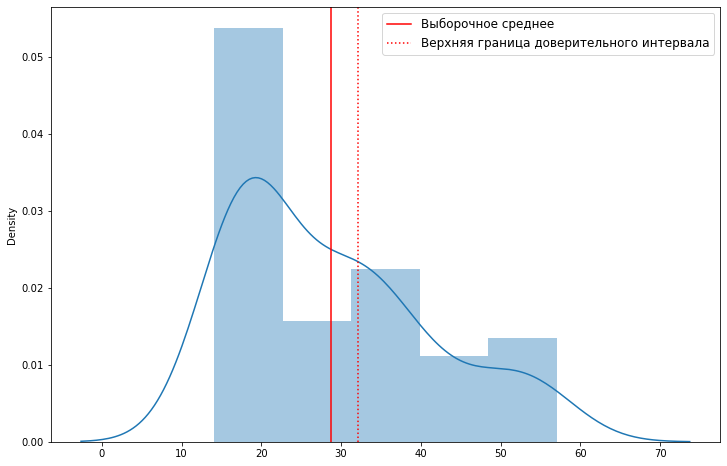

In [87]:
plt.figure(figsize=(12, 8))
arr = np.array(arr)
mu=30
mu_sample = np.mean(arr)
sigma_sample = np.std(arr)
median_sample = np.median(arr)
T1_mu_sample = mu_sample - 1.96 * (sigma_sample / np.sqrt(len(arr) - 1))
T2_mu_sample = mu_sample + 1.96 * (sigma_sample / np.sqrt(len(arr) - 1))
sns.distplot(arr)
#plt.axvline(median_sample, color='r', linestyle = '--', label='Медиана выборки')
plt.axvline(mu_sample, color='r', label='Выборочное среднее')
plt.axvline(T2_mu_sample, color='r', linestyle = ':', label='Верхняя граница доверительного интервала')
plt.legend(fontsize = 12)

#### 30 меньше верхней границы доверительного интервала, а значит с вероятностью 95% технические условия не соблюдены

#### Доверительный интервал для медианы:

D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


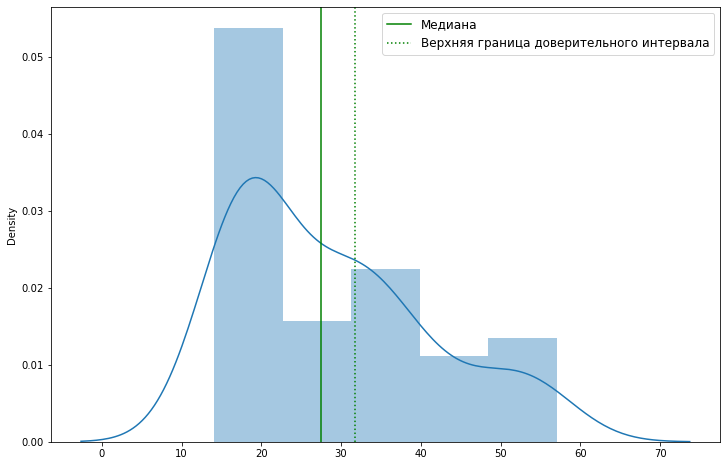

In [69]:
plt.figure(figsize=(12, 8))
#при объеме выорки 52 и 95% уровне доверия нижняя граница доверительного интервала
#19й элемент отсортированного списка при нумерации с 1
#или 18й при нумерации с нуля
#T1_median_sample = sorted(arr)[18]
#верхняя граница n - k + 1 = 34 или 33й элемент
T2_median_sample = sorted(arr)[33]
sns.distplot(arr)
plt.axvline(median_sample, color='g', label='Медиана')
plt.axvline(T2_median_sample, color='g', linestyle=':', label='Верхняя граница доверительного интервала')
plt.legend(fontsize = 12)

#### Доверительный интервал для sigma:

In [128]:
#для n = 52 и 95% доверительного интервала примем 
q = 0.21
T1_sigma_sample = sigma_sample*(1-q)
T2_sigma_sample = sigma_sample*(1+q)
T1_sigma_sample, T2_sigma_sample

(9.595494251417907, 14.696896258500843)

Ваши рассуждения
#### с вероятностью 95% технические условия не соблюдены

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    52.000000
mean     28.761538
std      12.264698
min      14.100000
25%      18.275000
50%      27.500000
75%      35.000000
max      57.000000
dtype: float64

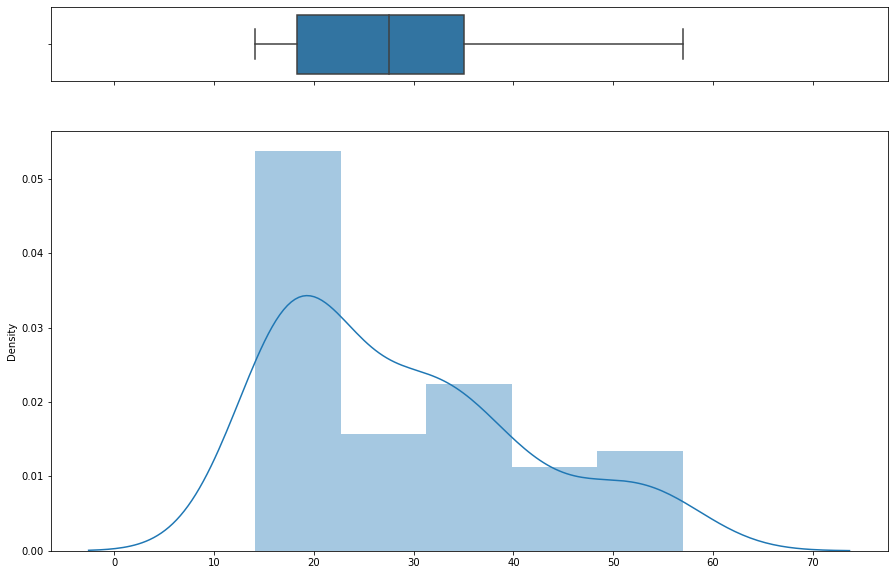

In [134]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)})
sns.boxplot(arr, ax=ax_box)
sns.distplot(arr, ax=ax_hist)
pd.Series(arr).describe()

In [110]:
#здесь рассчитаны границы доверительных интервалов для alpha = 0.01, т.е. t критерий по
#таблице Стьюдента для 52 наблюдений равен 2.007583768155882
t_critical = stats.t.ppf(q = 0.975, df=len(arr)-1)
x0 = mu_sample - t_critical * (sigma_sample / np.sqrt(len(arr) - 1))
x1 = mu_sample + t_critical * (sigma_sample / np.sqrt(len(arr) - 1))
x0, x1

(25.34702486909686, 32.176052053980065)

In [116]:
#ошибка среднего
SE = sigma_sample/np.sqrt(len(arr) - 1)
(mu_sample - 30)/SE

-0.7281608975300252

0.24801872461073715

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    52.000000
mean     28.761538
std      12.264698
min      14.100000
25%      18.275000
50%      27.500000
75%      35.000000
max      57.000000
dtype: float64

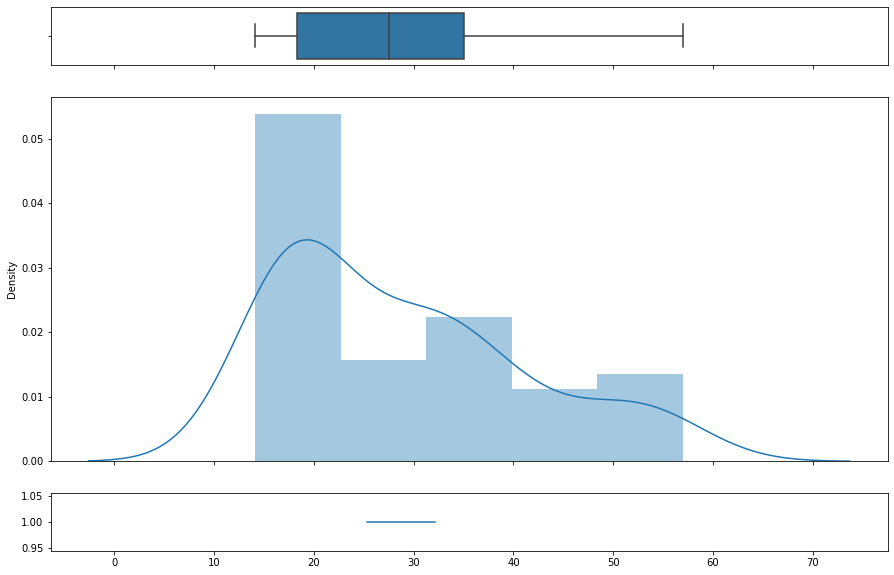

In [137]:
f, (ax_box, ax_hist, ax_interval) = plt.subplots(3, sharex=True, gridspec_kw={"height_ratios": (0.12, 0.76, 0.12)})
sns.boxplot(arr, ax=ax_box)
sns.distplot(arr, ax=ax_hist)
sns.lineplot(x = np.linspace(x0, x1), y = 1)
pd.Series(arr).describe()

-0.7290652982258582


Ваш вывод


# Задача 4 (2б)


Обширный мониторинг компьютерной системы совместного использования времени показал, что время отклика на конкретную команду редактирования, как правило, распределяется со стандартным отклонением 25 миллисекунд. Была установлена новая операционная система, и мы хотим оценить истинное среднее время отклика $\mu$ для новой среды. Если предположить, что время отклика все еще нормально распределено с $\sigma = $ 25, то какой размер выборки необходим для того, чтобы получившийся 95% доверительный интервал имел ширину (максимум) 10?

Ваши рассуждения
для 95% интервала z значение 1,96. Зная его, мат.ожидание и ско, можем вычислить верхнюю и нижнюю границу.
Ширина диапазона это разница между верхней и нижней.

In [162]:
sigma = 25
#alpha = 0.05
z = 1.96
mu = 25
#(mu + z * sigma / (n - 1)**0.5) - (mu - z * sigma / (n - 1)**0.5) = 10
# z * sigma / (n - 1)**0.5 + z * sigma / (n - 1)**0.5 = 10
# z * sigma / (n - 1)**0.5 = 5
# (n - 1)**0.5 = z * sigma / 5
# (n - 1)**0.5 = z * sigma / 5
z * sigma / 5

9.8

In [166]:
n = ((1.96 * sigma)**2 / 25) + 1
n - 1

96.04

In [167]:
#перепроверю
(n-1)**0.5

9.8

Ваш вывод
#### чтобы 95% доверительный интервал имел ширину максимум 10 необходимо максимум 96 наблюдений

# Задача на бонусный балл

Предположим мы сместили центр масс монеты таким образом, что выпадает она в 65% случаев решкой. Сколько подбрасываний нужно при заданном уровне значимости, чтобы определить, что она фальшивая? (ну т.е. не 50/50 вероятности орел/решка)

Ваши рассуждения

допустим вероятность выпадения решки для честной монеты это p1,
для "нечестной" p2
тогда модуль разницы |p1 - p2| должен быть меньше предела погрешности err_lim
допустим, наш уровень доверия 95%, т.е. err_lim = 0.05, тогда z_critical = 1.96
err_lim = SE (стандартная ошибка) * z_critical (для нашего доверительного интервала)
SE для данного распределения = корень p * q / n (число испытаний)
где p и q - вероятности "успеха" и "неуспеха" с максимумом в p = q = (1 - p) = 0.5
соответственно максимум SE = 0.5 / корень(n) = 1 / (2 * np.sqrt(n)) 
##### err_lim = z_critical / (2 * np.sqrt(n))
##### np.sqrt(n) = z_critical / (2 * err_lim)
##### n = квадрат(z_critical) / (4 * квадрат(err_lim))

In [160]:
z_critical_95 = norm.ppf(0.975)
err_lim = 0.05
n_95 = z_critical_95**2 / (4 * err_lim**2)
round(n_95 + 1)

385

#### чтобы доказать, что монета "нечестная" с вероятностью в 95% необходимо не менее 385 подбрасываний